In [1]:
%matplotlib inline

from scipy.integrate import odeint
import matplotlib.pyplot as plt  
import numpy as np
import math

# Parámetros
E = 2**0.5*1/2 # CAMBIAR COMO SQRT(2)*((2N+1)/2)
m = 1

In [2]:
# Recibe un valor del eje x, el ancho tal que el potencial es diferente de cero en [-l,l] 
# y la profundidad del pozo V_0
def Pozo(x):
    
    # Ancho y profundida del pozo 
    l = 2
    V_0 = 4
    
    if x<-l or x>l:
        return V_0
    if x>=-l and x<=l:
        return 0
    
# Función de potencial de oscilador armónico. Recibe un punto en el eje x y la constante
def Oscilador(x):
    
    # Constante de elasticidad
    k = 2
    
    return (1/2)*k*x**2

# Recibe un valor del eje x, el ancho tal que el potencial es diferente de cero en [-l,l] 
def PozoInf(x):
    
    # Ancho y profundida del pozo 
    l = 5.0
    V_0 = 1e100
    
    if x<-l or x>l:
        return V_0
    if x>=-l and x<=l:
        return 0

    
# Función de la ecuación de Schrödinger
def psi(Psi, x, V):
    
    # Linealizando la ec. de Schrödinger
    # x_1' = x_2 = psi     
    # x_2' = (2m/hb**2)*(V(x)-E)x_1 = psi'
    
    return [Psi[1], (2*m)*(V(x) - E)*Psi[0]]




In [3]:
x0 = [0.0, 0.1]
val = np.linspace(-5,5,1000)
sol = odeint(psi, x0, val, args=(Oscilador,))


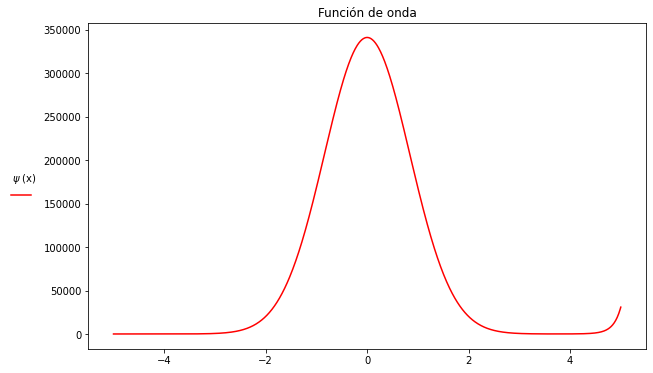

In [4]:
#Gráfica
fig = plt.figure(figsize=(10,6))
plt.plot(val,sol[:,0],color = "red",label = " " )
plt.title("Función de onda")
leg = plt.legend(title = "$\psi$ (x)  ", loc = "center", bbox_to_anchor=[-.11,.5],frameon=False)

plt.show()


In [5]:

x0 = [0.0, 0.1]
val = np.linspace(-5,5,1000)
sol = odeint(psi, x0, val, args=(Pozo,))


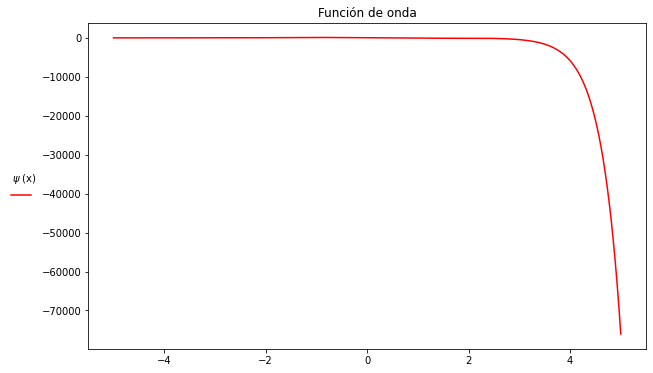

In [6]:
#Gráfica
fig = plt.figure(figsize=(10,6))
plt.plot(val,sol[:,0],color = "red",label = " " )
plt.title("Función de onda")
leg = plt.legend(title = "$\psi$ (x)  ", loc = "center", bbox_to_anchor=[-.11,.5],frameon=False)

plt.show()

Los autovalores de energía E_n son:

E_0 =  0.7071067811865476
E_1 =  2.121320343559643
E_2 =  3.5355339059327378
E_3 =  4.949747468305833


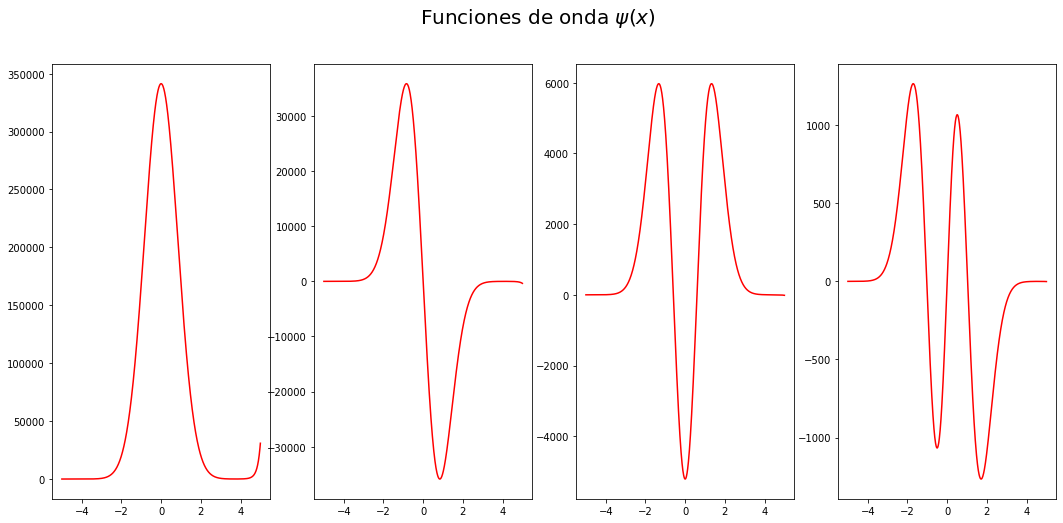

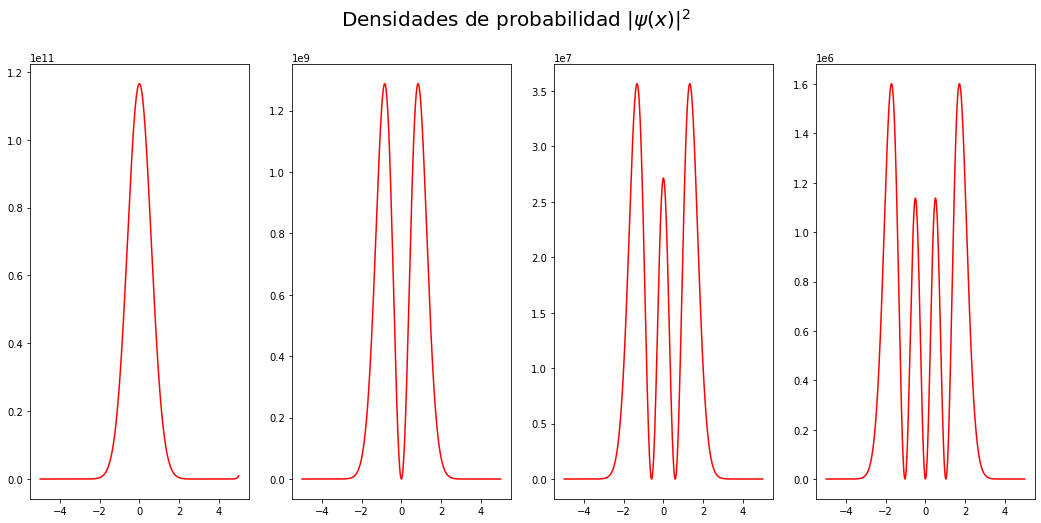

In [7]:
# Condiciones de frontera, valores nulos de la función de onda en los extremos del intervalo y 
# derivada muy cercana a cero
x0 = [0.0, 0.1]

# Intervalo de soluciṕn 
val = np.linspace(-5,5,1000)

print("Los autovalores de energía E_n son:\n")

# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Funciones de onda $\psi(x)$", size = '20' )

# Solución de la ec de Scrödinger. NO NORMALIZADA.

for i in range(0,4):   
    
    # Autovalor de energía
    E = 2**0.5*(i+0.5)
    print("E_%d = "%i, E)
    
    # Solución de la ecuación y gráfica
    sol = odeint(psi, x0, val, args=(Oscilador,)) 
    ax[i].plot(val,sol[:,0],color = "red",label = " " )
plt.show()  
    
# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Densidades de probabilidad $|\psi(x)|^2$", size = '20' )

# Densidad de probabilidad NO NORMALIZADAS

for i in range(0,4):    
    E = 2**0.5*(i+0.5)
    sol = odeint(psi, x0, val, args=(Oscilador,)) 
    ax[i].plot(val,sol[:,0]**2,color = "red",label = " " )
plt.show()  
 

In [8]:
import scipy.optimize as scp

l = 2
V_0 = 4

# Funciones de energías para las funciones de onda simétricas y antisimétrica
def E_sym(E):
    return np.sqrt(V_0-E) - np.sqrt(E)*np.tan(np.sqrt(E/2)*2*l) 

def E_asym(E):
    return np.sqrt(V_0-E) + np.sqrt(E)*1/np.tan(np.sqrt(E/2)*2*l) 


#Esta parte se utiliza para hallar las de energías más facilmente usando guess de la raíz
guess = np.round(np.arange(0.1, 4, 0.1),6)

# Arreglo de autovalores de energía
ENER = []

# Se depuran las raíces
for i in range(0,len(guess)):
    
    # Raíces usando el arreglo guess como valor cercano a la raíz real
    a = np.round(scp.fsolve(E_sym, guess[i])[0], 6)
    b = np.round(scp.fsolve(E_asym, guess[i])[0], 6)
    
    # El algoritmo a veces retorna el valor del guess por tanto se descartan estos
    if a not in guess:
        ENER.append(a)
        #print(a)
    
    if b not in guess:
        ENER.append(b)
        #print(b)
        
# Se quitan los valores repetidos
ENER = np.unique(ENER)
# Se organizan de menor a mayor
ENER = np.sort(ENER)
# Se toman solo los 4 primeros
ENER = ENER[:4]
    





<ipython-input-8-1064104c5347>:11: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(V_0-E) + np.sqrt(E)*1/np.tan(np.sqrt(E/2)*2*l)
/home/usuario/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-8-1064104c5347>:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(V_0-E) - np.sqrt(E)*np.tan(np.sqrt(E/2)*2*l)


Los autovalores de energía E_n son:

E_0 =  0.222087
E_1 =  0.880048
E_2 =  1.941936
E_3 =  3.305328


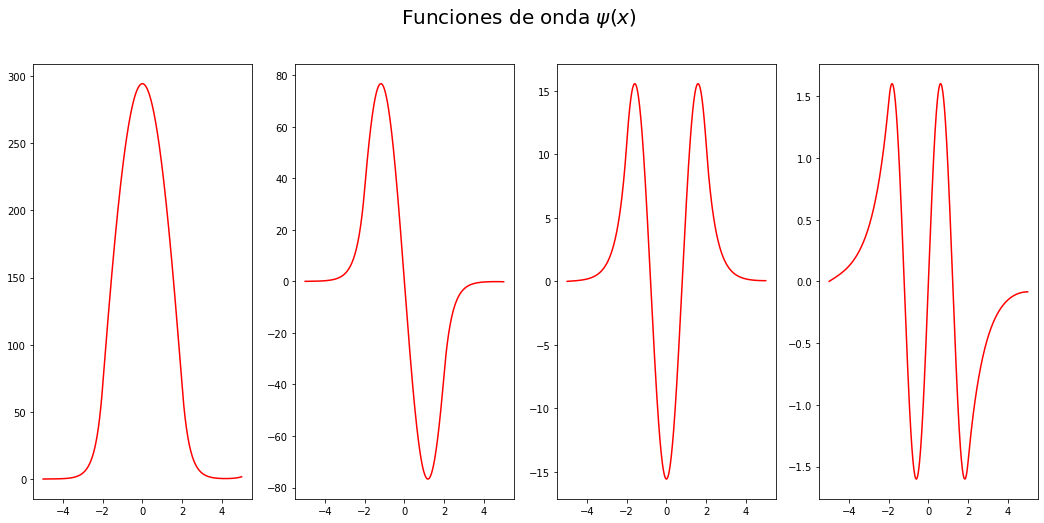

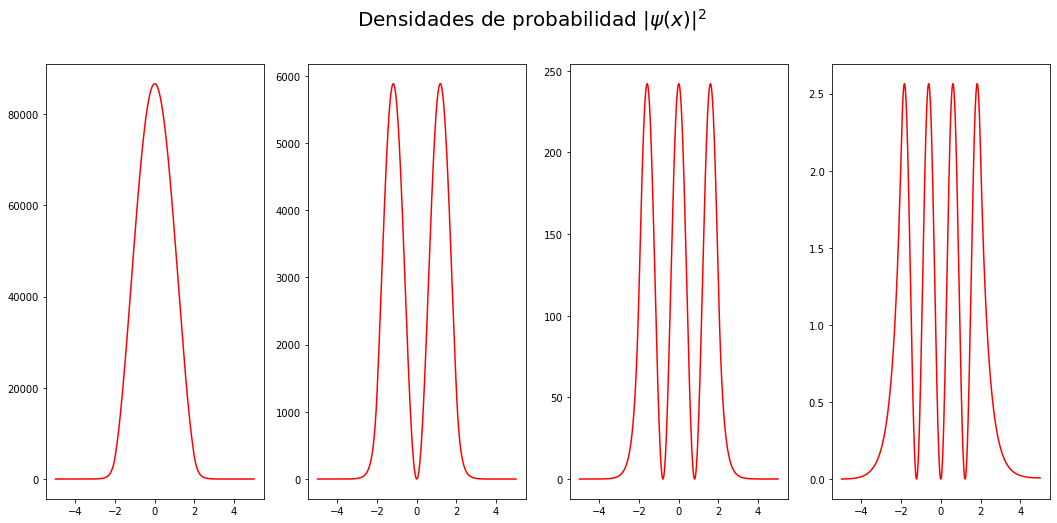

In [9]:
# Condiciones iniciales e intervalo de solución
x0 = [0.0, 0.1]
val = np.linspace(-5,5,1000)

print("Los autovalores de energía E_n son:\n")

# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Funciones de onda $\psi(x)$", size = '20' )

# Solución de la ec de Scrödinger. NO NORMALIZADA

for i in range(0,4):
    
    #Valores de energía

    E = ENER[i]
        
    print("E_%d = "%i, E)
    
    # Solución y gráfica
    sol = odeint(psi, x0, val, args=(Pozo,)) 
    ax[i].plot(val,sol[:,0],color = "red",label = " " )
plt.show() 


# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Densidades de probabilidad $|\psi(x)|^2$", size = '20' )

# Densidad de probabilidad. NO NORMALIZADA.
for i in range(0,4):    
 
    E = ENER[i]
        
    sol = odeint(psi, x0, val, args=(Pozo,)) 
    ax[i].plot(val,sol[:,0]**2,color = "red",label = " " )
plt.show()  


Los autovalores de energía E_n son:

E_1 =  0.04934802200544679
E_2 =  0.19739208802178715
E_3 =  0.44413219804902115
E_4 =  0.7895683520871486


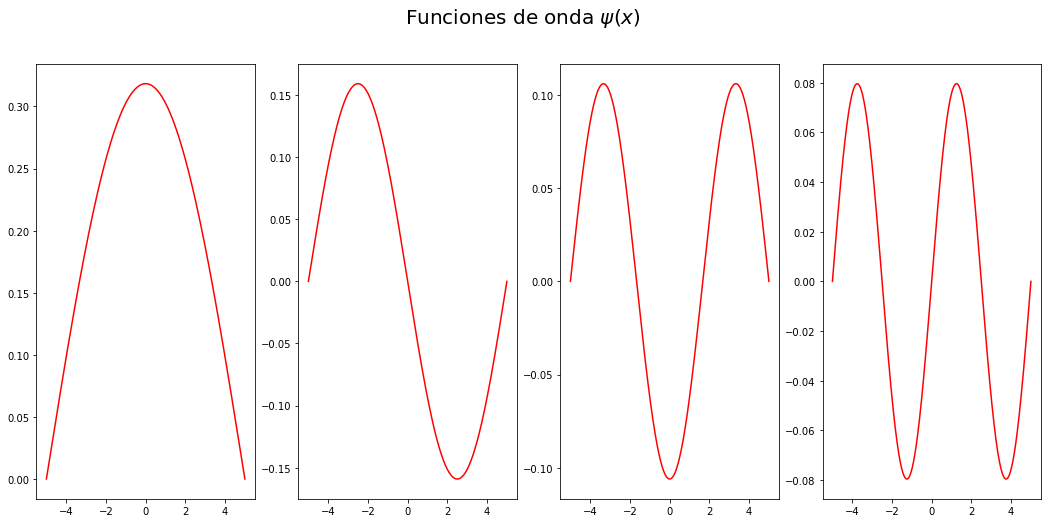

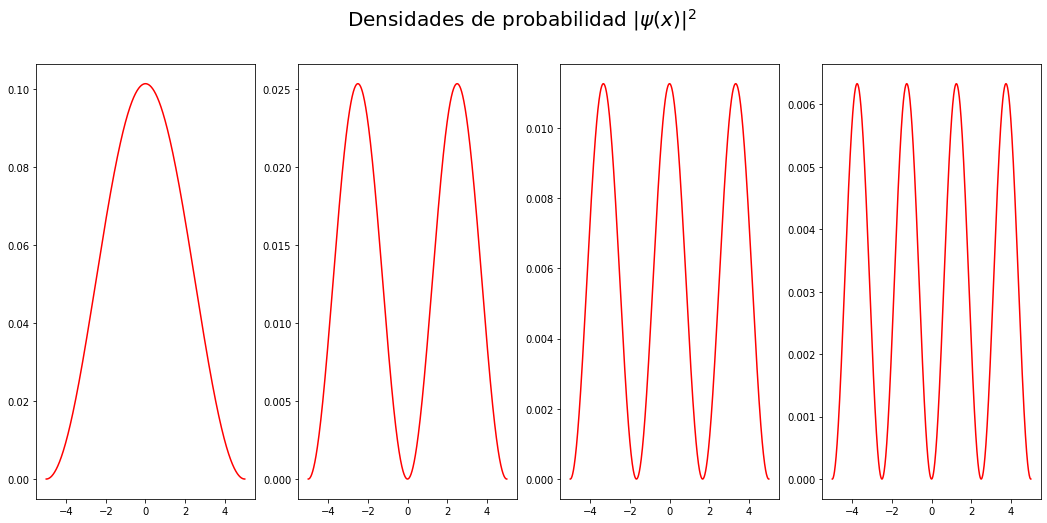

In [10]:
# Condiciones iniciales e intervalo de solución
x0 = [0.0, 0.1]
val = np.linspace(-5,5,1000)
l = 5.0

print("Los autovalores de energía E_n son:\n")

# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Funciones de onda $\psi(x)$", size = '20' )

# Solución de la ec de Scrödinger. NO NORMALIZADA

for i in range(0,4):
    
    #Valores de energía

    E = ((i+1)**2*np.pi**2)/(8*l**2)
        
    print("E_%d = "%(i+1), E)
    
    # Solución y gráfica
    sol = odeint(psi, x0, val, args=(PozoInf,)) 
    ax[i].plot(val,sol[:,0],color = "red",label = " " )
plt.show() 


# Figura
fig, ax = plt.subplots(1,4,figsize=(18,8))
plt.suptitle("Densidades de probabilidad $|\psi(x)|^2$", size = '20' )

# Densidad de probabilidad. NO NORMALIZADA.
for i in range(0,4):    
 
    E = ((i+1)**2*np.pi**2)/(8*l**2)
        
    sol = odeint(psi, x0, val, args=(PozoInf,)) 
    ax[i].plot(val,sol[:,0]**2,color = "red",label = " " )
plt.show()  